In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("2015.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2015,17094,263,32,3546
1,2015,17331,390,41,3519
2,2015,17513,289,32,3539
3,2015,17257,209,27,3511
4,2015,17920,200,14,3540
...,...,...,...,...,...
1790,2015,17446,219,33,3539
1791,2015,17137,212,27,3503
1792,2015,17698,105,19,3561
1793,2015,17902,229,18,3543


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1795, 5)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1795 non-null   int64
 1   Maximum length (m))  1795 non-null   int64
 2   Recession(m),        1795 non-null   int64
 3   Rate/yr(m)           1795 non-null   int64
 4   Snout altitude (m)   1795 non-null   int64
dtypes: int64(5)
memory usage: 70.2 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1795


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2015,17094,263,32,3546
1,2015,17331,390,41,3519
2,2015,17513,289,32,3539
3,2015,17257,209,27,3511
4,2015,17920,200,14,3540


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0426,-0.0043,0.0214
"Recession(m),",NaN,-0.0426,1.0000,0.0076,-0.0088
Rate/yr(m),NaN,-0.0043,0.0076,1.0000,-0.0090
Snout altitude (m),NaN,0.0214,-0.0088,-0.0090,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Snout altitude (m)     0.0214
Rate/yr(m)            -0.0043
Recession(m),         -0.0426
Year                      NaN
Name: Maximum length (m)), dtype: float64

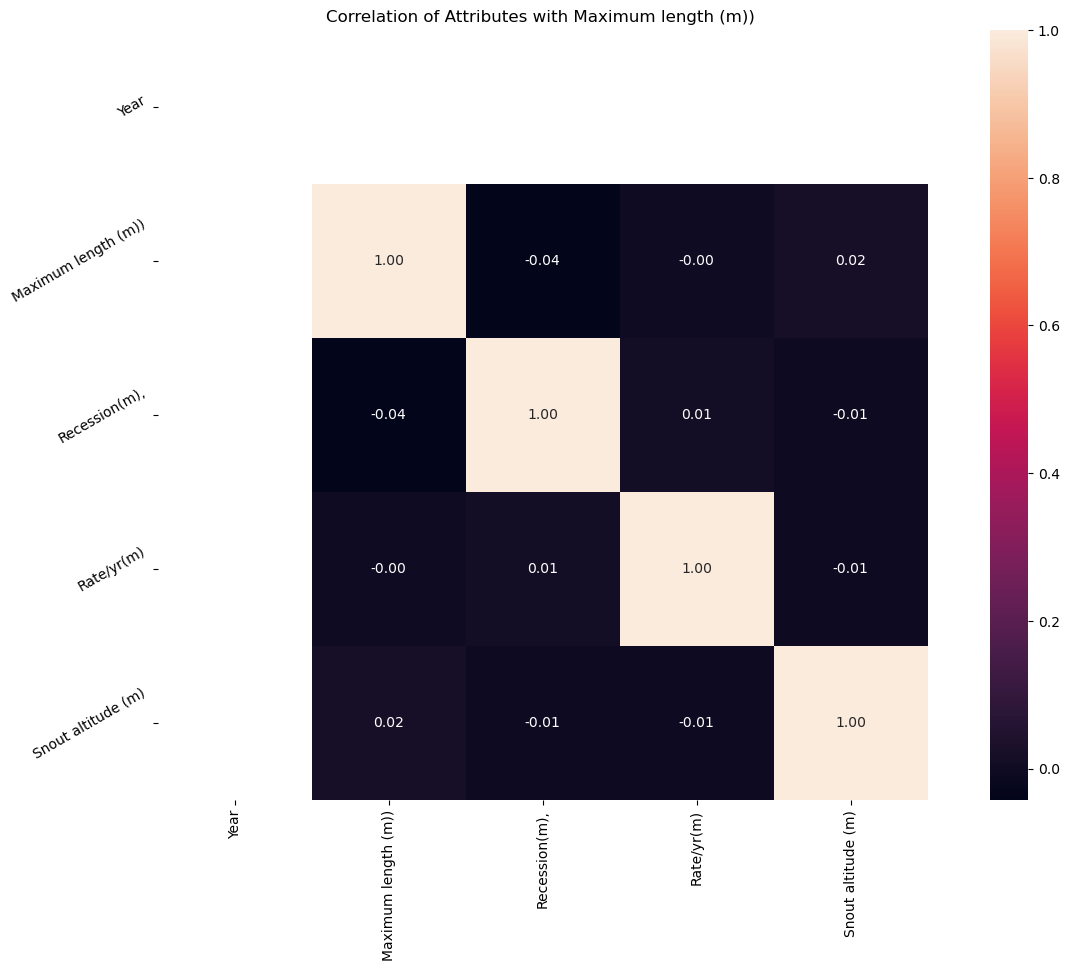

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,795.0000","1,795.0000","1,795.0000","1,795.0000","1,795.0000"
mean,"2,015.0000","17,564.0674",217.9543,27.3354,"3,532.2758"
std,0.0000,298.1068,127.0199,8.7716,20.7532
min,"2,015.0000","17,036.0000",0.0000,13.0000,"3,496.0000"
25%,"2,015.0000","17,300.5000",108.5000,20.0000,"3,514.0000"
50%,"2,015.0000","17,582.0000",214.0000,27.0000,"3,532.0000"
75%,"2,015.0000","17,824.0000",330.0000,35.0000,"3,551.0000"
max,"2,015.0000","18,066.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2015   1.0000
Name: Year, dtype: float64

250   0.0061
264   0.0056
118   0.0056
200   0.0050
301   0.0050
       ...  
293   0.0006
63    0.0006
73    0.0006
173   0.0006
219   0.0006
Name: Recession(m),, Length: 435, dtype: float64

39   0.0401
41   0.0390
24   0.0384
20   0.0384
13   0.0384
27   0.0379
18   0.0379
17   0.0368
28   0.0357
21   0.0351
30   0.0351
14   0.0340
19   0.0340
40   0.0340
34   0.0334
32   0.0334
16   0.0329
31   0.0329
25   0.0323
42   0.0318
22   0.0312
23   0.0306
33   0.0306
38   0.0301
36   0.0301
15   0.0295
35   0.0295
37   0.0284
29   0.0245
26   0.0240
Name: Rate/yr(m), dtype: float64

3565   0.0228
3527   0.0206
3555   0.0184
3540   0.0178
3539   0.0173
        ...  
3548   0.0100
3524   0.0084
3541   0.0078
3549   0.0072
3496   0.0006
Name: Snout altitude (m), Length: 72, dtype: float64



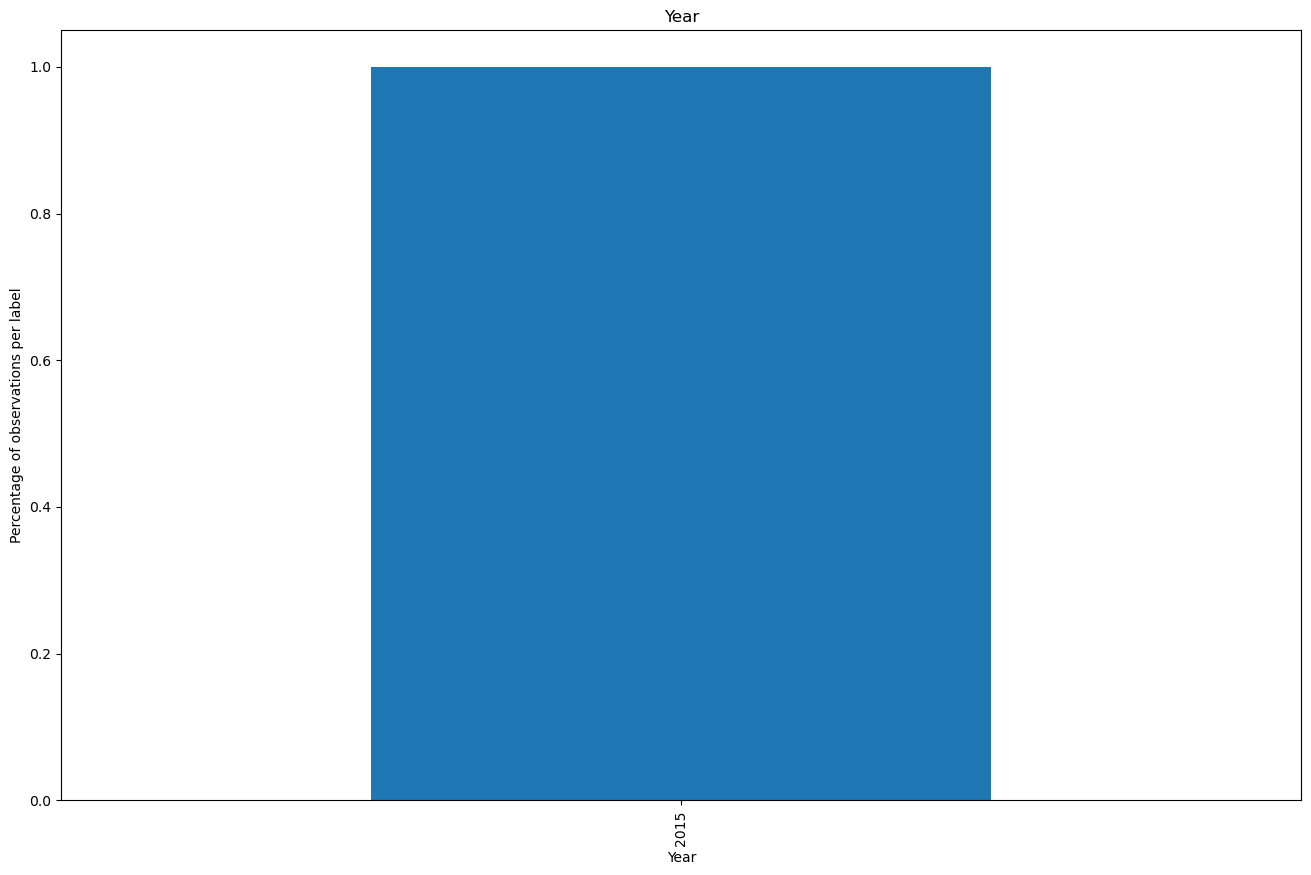

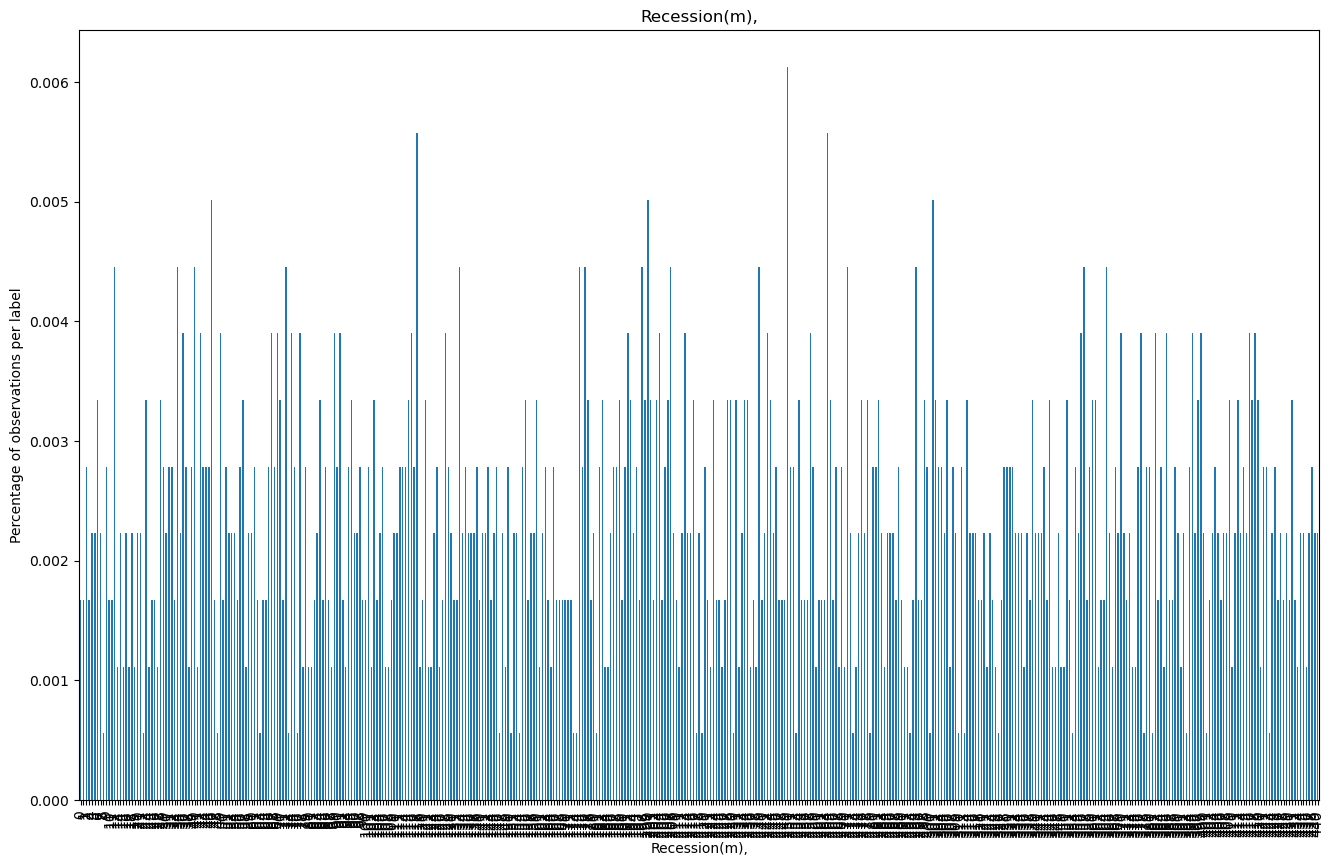

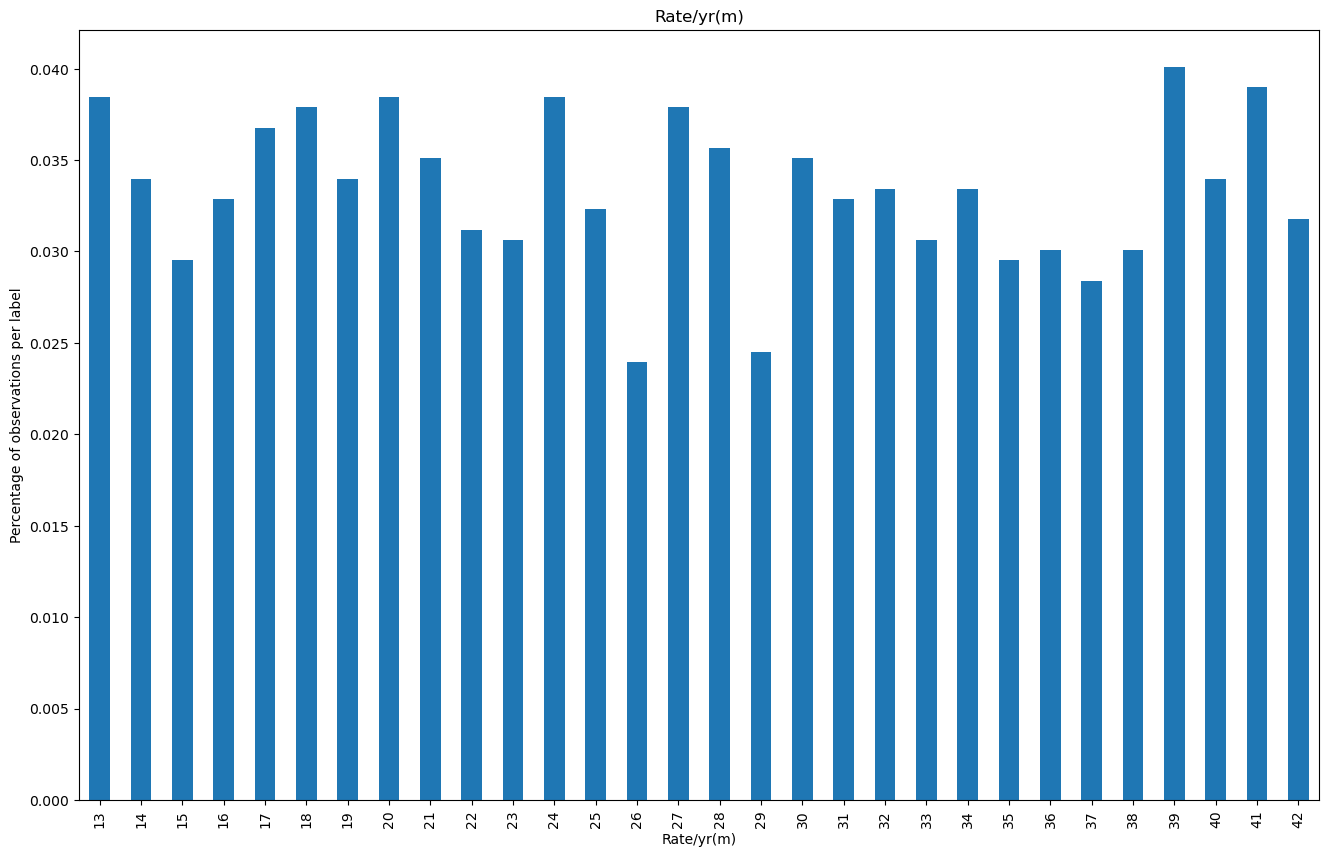

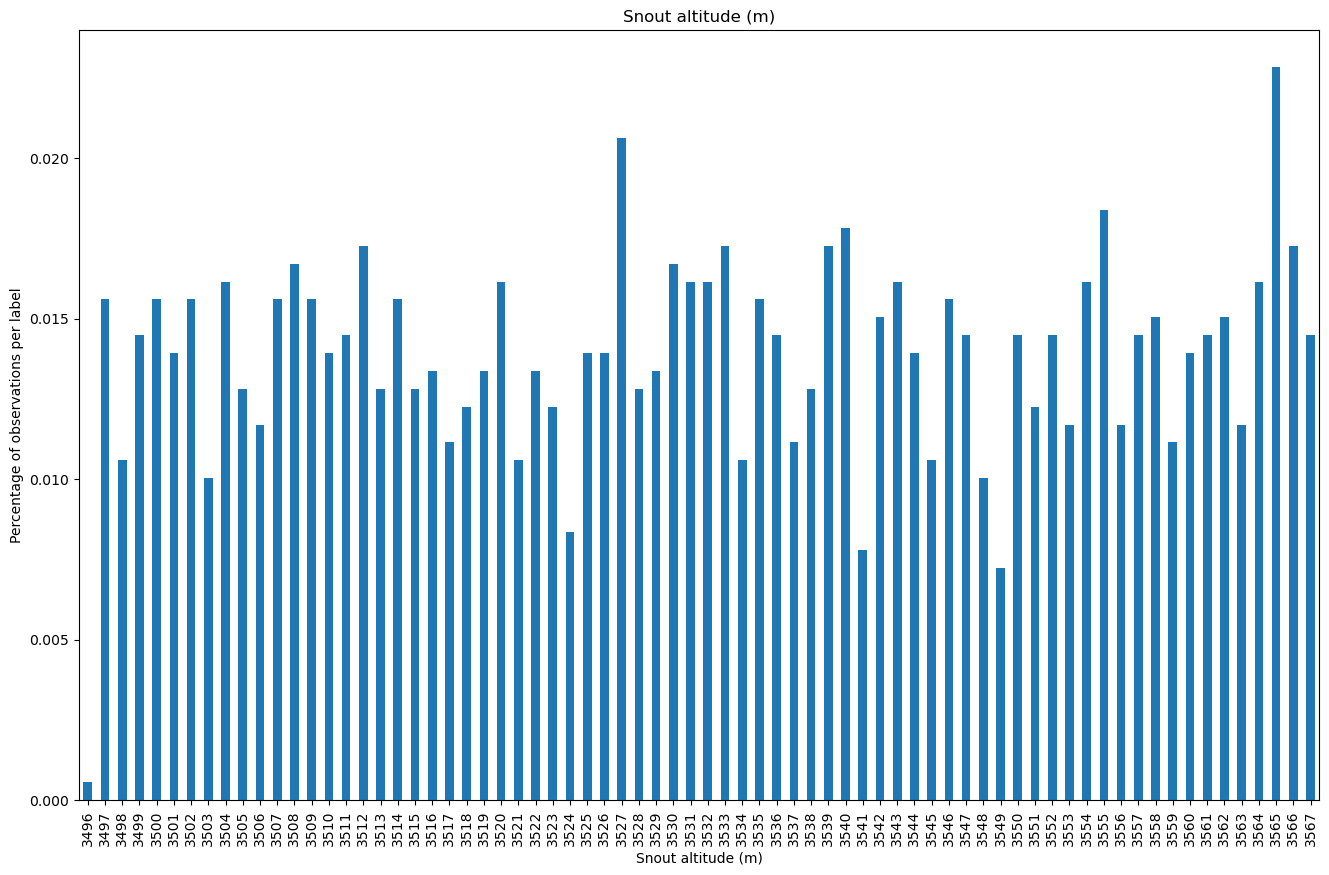

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()